In [24]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['APD','PFFV','DVN','MFA','MPW','PAA','T','UPS','VHT','ECOM','VIG','VUG','NLY','PYPL','VGT','GOOGL','VZ','VOO','CWEN-A']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2020-1-1')['Adj Close'] 

In [26]:
pf_data.head() #makre sure companies were public at starting date

,APD,PFFV,DVN,MFA,MPW,PAA,T,UPS,VHT,ECOM,VIG,VUG,NLY,PYPL,VGT,GOOGL,VZ,VOO,CWEN-A
Date,,,,,,,,,,,,,,,,,,,
2020-01-02,220.009277,NaN,22.485584,23.495901,18.419596,15.506801,24.701082,109.851044,186.586243,9.13,120.356071,182.066284,7.278163,110.750000,244.492371,1368.680054,54.624271,288.039520,17.227924
2020-01-03,215.116806,NaN,22.755865,23.680424,18.543633,15.656224,24.828209,109.785194,184.954178,9.02,119.837563,180.815018,7.239778,108.760002,241.923294,1361.520020,54.042690,285.935333,17.182802
2020-01-06,215.021622,NaN,23.026144,23.557409,18.632229,15.996577,24.853636,109.296074,186.178207,9.21,119.914375,181.977631,7.262809,110.169998,242.727341,1397.810059,53.926376,287.006683,17.209875
2020-01-07,215.935394,NaN,23.095896,23.588161,18.472752,15.971673,24.948984,109.107971,185.857651,9.14,119.587898,181.918518,7.308874,109.669998,242.697952,1395.109985,53.326893,286.215240,17.092556
2020-01-08,217.106155,NaN,22.276333,23.557409,18.534773,15.656224,25.025259,109.728767,187.042770,9.49,120.154449,183.347153,7.255132,111.820000,245.257202,1405.040039,53.425312,287.691986,17.327200


In [27]:
pf_data.tail() #check companies still open and public at ending date

,APD,PFFV,DVN,MFA,MPW,PAA,T,UPS,VHT,ECOM,VIG,VUG,NLY,PYPL,VGT,GOOGL,VZ,VOO,CWEN-A
Date,,,,,,,,,,,,,,,,,,,
2022-04-19,249.570007,25.180000,63.000000,14.180,19.809999,11.32,19.490000,190.690002,256.269989,15.46,161.960007,276.019989,6.550,103.660004,392.380005,2600.179932,53.750000,409.019989,31.350000
2022-04-20,248.740005,25.330000,64.610001,14.460,20.190001,11.44,19.430000,190.429993,259.350006,15.26,163.500000,272.899994,6.710,94.900002,390.760010,2560.800049,54.410000,408.709991,32.290001
2022-04-21,251.139999,25.219999,61.150002,14.080,20.330000,11.35,20.209999,188.800003,255.860001,14.61,161.869995,267.230011,6.670,89.400002,383.239990,2496.290039,55.009998,402.649994,30.790001
2022-04-22,242.919998,25.170000,58.070000,13.610,18.760000,11.10,19.520000,187.149994,246.800003,14.26,157.479996,259.559998,6.520,86.029999,372.649994,2392.709961,51.910000,391.660004,29.410000
2022-04-25,239.065002,25.179899,54.465000,13.415,18.620001,10.41,19.221500,184.929993,244.827499,14.50,155.839996,258.829987,6.345,87.089996,372.230011,2423.770020,50.044998,387.220001,28.860001


<AxesSubplot:xlabel='Date'>

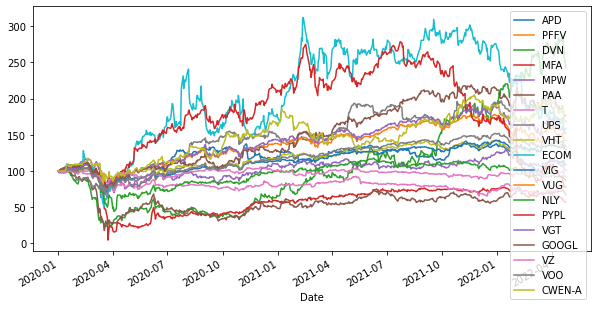

In [28]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [29]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [30]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

APD       0.035681
PFFV      0.057952
DVN       0.380019
MFA      -0.240744
MPW       0.004648
PAA      -0.171182
T        -0.107740
UPS       0.223734
VHT       0.116693
ECOM      0.198704
VIG       0.110986
VUG       0.151117
NLY      -0.058940
PYPL     -0.103236
VGT       0.180553
GOOGL     0.245480
VZ       -0.037610
VOO       0.127103
CWEN-A    0.221617
dtype: float64

In [31]:
log_returns.cov() * 250 #get coveriance between each pair.

,APD,PFFV,DVN,MFA,MPW,PAA,T,UPS,VHT,ECOM,VIG,VUG,NLY,PYPL,VGT,GOOGL,VZ,VOO,CWEN-A
APD,0.111939,0.004869,0.095573,-0.017598,0.082184,0.084486,0.052562,0.054545,0.053710,0.074307,0.060740,0.062626,0.065995,0.073607,0.069156,0.060613,0.035565,0.063906,0.063666
PFFV,0.004869,0.005721,0.010808,0.007248,0.005928,0.007403,0.001902,0.005236,0.004419,0.011641,0.004477,0.007792,0.005444,0.011273,0.008505,0.008026,0.001081,0.005827,0.005116
DVN,0.095573,0.010808,0.578260,0.015078,0.123447,0.380583,0.084085,0.066622,0.070937,0.154476,0.087496,0.091176,0.130184,0.100489,0.099581,0.098439,0.040859,0.104299,0.091024
MFA,-0.017598,0.007248,0.015078,2.788777,0.124804,0.155819,0.046387,0.026075,-0.001499,-0.164401,0.003210,-0.003159,0.219508,-0.058862,-0.016339,-0.011189,0.043308,0.005219,0.063263
MPW,0.082184,0.005928,0.123447,0.124804,0.170696,0.140904,0.066679,0.057748,0.065535,0.096345,0.072442,0.076193,0.101973,0.084475,0.080538,0.072284,0.043069,0.078007,0.087173
PAA,0.084486,0.007403,0.380583,0.155819,0.140904,0.531782,0.068501,0.052415,0.068394,0.164710,0.078874,0.084288,0.164536,0.089871,0.087907,0.081282,0.033675,0.094419,0.114699
T,0.052562,0.001902,0.084085,0.046387,0.066679,0.068501,0.083566,0.038742,0.039384,0.035476,0.046310,0.039219,0.058665,0.037270,0.042147,0.037301,0.042587,0.047153,0.043170
UPS,0.054545,0.005236,0.066622,0.026075,0.057748,0.052415,0.038742,0.113389,0.042103,0.056425,0.047806,0.052716,0.047322,0.064084,0.057509,0.049052,0.027114,0.050933,0.043932
VHT,0.053710,0.004419,0.070937,-0.001499,0.065535,0.068394,0.039384,0.042103,0.053553,0.071806,0.048924,0.055225,0.046042,0.065343,0.060000,0.052621,0.028268,0.053017,0.054007
ECOM,0.074307,0.011641,0.154476,-0.164401,0.096345,0.164710,0.035476,0.056425,0.071806,0.416868,0.071067,0.101854,0.075887,0.152963,0.111434,0.088594,0.018985,0.086525,0.089648


In [32]:
log_returns.corr() #get correlation between each pair.

,APD,PFFV,DVN,MFA,MPW,PAA,T,UPS,VHT,ECOM,VIG,VUG,NLY,PYPL,VGT,GOOGL,VZ,VOO,CWEN-A
APD,1.000000,0.261172,0.375651,-0.031497,0.594547,0.346281,0.543454,0.484144,0.693708,0.343983,0.779080,0.663271,0.465366,0.442087,0.660066,0.558007,0.528841,0.750796,0.503311
PFFV,0.261172,1.000000,0.256246,0.290888,0.315006,0.225718,0.116220,0.236026,0.391222,0.274900,0.432088,0.484434,0.354287,0.325701,0.477386,0.385227,0.092893,0.492279,0.231366
DVN,0.375651,0.256246,1.000000,0.011874,0.392923,0.686311,0.382510,0.260177,0.403109,0.314631,0.493768,0.424859,0.403899,0.265544,0.418180,0.398725,0.267315,0.539125,0.316603
MFA,-0.031497,0.290888,0.011874,1.000000,0.180888,0.127952,0.096089,0.046370,-0.003880,-0.152475,0.008249,-0.006702,0.310114,-0.070829,-0.031243,-0.020637,0.129021,0.012284,0.100199
MPW,0.594547,0.315006,0.392923,0.180888,1.000000,0.467678,0.558297,0.415086,0.685444,0.361176,0.752452,0.653480,0.582306,0.410863,0.622501,0.538890,0.518625,0.742154,0.558078
PAA,0.346281,0.225718,0.686311,0.127952,0.467678,1.000000,0.324952,0.213453,0.405284,0.349827,0.464158,0.409567,0.532318,0.247646,0.384951,0.343316,0.229743,0.508937,0.416019
T,0.543454,0.116220,0.382510,0.096089,0.558297,0.324952,1.000000,0.398004,0.588732,0.190074,0.687481,0.480738,0.478788,0.259074,0.465590,0.397444,0.732921,0.641161,0.394990
UPS,0.484144,0.236026,0.260177,0.046370,0.415086,0.213453,0.398004,1.000000,0.540306,0.259528,0.609242,0.554735,0.331557,0.382424,0.545379,0.448679,0.400597,0.594547,0.345076
VHT,0.693708,0.391222,0.403109,-0.003880,0.685444,0.405284,0.588732,0.540306,1.000000,0.480586,0.907265,0.845611,0.469394,0.567394,0.827964,0.700382,0.607706,0.900528,0.617277
ECOM,0.343983,0.274900,0.314631,-0.152475,0.361176,0.349827,0.190074,0.259528,0.480586,1.000000,0.472352,0.558990,0.277299,0.476064,0.551146,0.422642,0.146289,0.526764,0.367249


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [33]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [34]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [35]:
portfolios.head() #checking to see if any error

,Return,Volatility,APD,PFFV,DVN,MFA,MPW,PAA,T,UPS,...,ECOM,VIG,VUG,NLY,PYPL,VGT,GOOGL,VZ,VOO,CWEN-A
0,0.073621,0.273867,0.000637,0.079274,0.048932,0.029052,0.073117,0.090619,0.023569,0.000515,...,0.066797,0.055613,0.083364,0.013233,0.085125,0.024784,0.092593,0.073959,0.024480,0.088767
1,0.087051,0.291721,0.091062,0.003881,0.111867,0.057369,0.036622,0.034805,0.044215,0.049660,...,0.062412,0.089056,0.075826,0.038040,0.062308,0.046565,0.004052,0.073128,0.021557,0.080729
2,0.069602,0.273146,0.049883,0.038350,0.096064,0.017865,0.019387,0.054084,0.067905,0.052086,...,0.037994,0.061052,0.001039,0.090951,0.092944,0.003938,0.058188,0.096918,0.083460,0.072918
3,0.070428,0.316366,0.088728,0.072260,0.106183,0.090758,0.029575,0.091929,0.042151,0.091883,...,0.091625,0.019624,0.002550,0.012100,0.062451,0.035561,0.017293,0.030270,0.025511,0.069832
4,0.081242,0.291877,0.067860,0.040022,0.117305,0.023171,0.066265,0.087288,0.075735,0.053620,...,0.019994,0.004703,0.022910,0.040343,0.074201,0.000361,0.095446,0.022697,0.007439,0.054447


In [36]:
portfolios.tail() #checking to see if any error

,Return,Volatility,APD,PFFV,DVN,MFA,MPW,PAA,T,UPS,...,ECOM,VIG,VUG,NLY,PYPL,VGT,GOOGL,VZ,VOO,CWEN-A
2995,0.043137,0.268612,0.113743,0.063092,0.000183,0.040448,0.068525,0.119246,0.093743,0.093857,...,0.062006,0.015427,0.005730,0.038016,0.008950,0.035233,0.093772,0.033562,0.098667,0.000461
2996,0.029099,0.273876,0.035725,0.119118,0.005660,0.087137,0.016679,0.064057,0.025786,0.027415,...,0.001452,0.030818,0.018705,0.087195,0.118962,0.020372,0.108437,0.026753,0.071733,0.039262
2997,0.096777,0.280663,0.004383,0.016858,0.075220,0.020729,0.102144,0.008705,0.090685,0.090405,...,0.105602,0.043572,0.039114,0.029831,0.110662,0.006677,0.110066,0.012079,0.032966,0.003764
2998,0.074204,0.262302,0.066701,0.066848,0.013201,0.009745,0.035442,0.058331,0.070790,0.044044,...,0.075992,0.067277,0.073575,0.084309,0.072265,0.039562,0.079215,0.004051,0.012395,0.084554
2999,0.077461,0.273285,0.018357,0.055343,0.090100,0.040538,0.085833,0.033867,0.054281,0.057102,...,0.064452,0.044207,0.045048,0.025969,0.090812,0.063369,0.036185,0.087438,0.052919,0.037076


In [37]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,APD,PFFV,DVN,MFA,MPW,PAA,T,UPS,...,ECOM,VIG,VUG,NLY,PYPL,VGT,GOOGL,VZ,VOO,CWEN-A
2256,0.072850,0.222076,0.119837,0.110796,0.007178,0.002517,0.082926,0.006183,0.027127,0.128632,...,0.004034,0.100693,0.025950,0.046734,0.049823,0.048658,0.004886,0.073551,0.062450,0.002407
2829,0.059978,0.223026,0.089748,0.071119,0.007321,0.007847,0.001911,0.040120,0.103706,0.160562,...,0.000989,0.019411,0.064681,0.031100,0.059609,0.058505,0.022027,0.113093,0.055372,0.001318
1066,0.096807,0.223287,0.010178,0.084696,0.017458,0.002912,0.027703,0.017166,0.078116,0.082511,...,0.056866,0.099864,0.115220,0.021663,0.004268,0.046312,0.063141,0.110784,0.088969,0.008241
2643,0.074821,0.224561,0.069488,0.121669,0.013717,0.031873,0.047045,0.027387,0.091747,0.112809,...,0.005026,0.019015,0.036920,0.022538,0.027513,0.070289,0.029689,0.020962,0.111314,0.024344
2616,0.056184,0.225866,0.065692,0.092071,0.006499,0.018949,0.029704,0.007898,0.118572,0.100332,...,0.023447,0.102057,0.103124,0.018018,0.107886,0.005041,0.035194,0.055884,0.028247,0.021271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,0.060002,0.345969,0.037735,0.007057,0.090038,0.127509,0.061866,0.020281,0.058107,0.061658,...,0.103166,0.013667,0.049369,0.093329,0.082996,0.002713,0.052772,0.000053,0.049185,0.047165
1249,0.048806,0.346481,0.084219,0.004126,0.122466,0.120023,0.029476,0.056485,0.011194,0.030294,...,0.088669,0.010013,0.013581,0.126149,0.020535,0.036222,0.012889,0.111849,0.030586,0.005919
1926,0.054754,0.346721,0.010936,0.099166,0.084785,0.150597,0.016213,0.031453,0.020693,0.000471,...,0.016095,0.027880,0.119461,0.067866,0.071257,0.087861,0.067861,0.009547,0.060566,0.005235
2865,0.078258,0.350476,0.065758,0.010998,0.110071,0.116401,0.032288,0.091489,0.004941,0.028680,...,0.113443,0.110271,0.048623,0.011659,0.054928,0.031930,0.074048,0.005451,0.065323,0.004949


Text(0, 0.5, 'Expected Return')

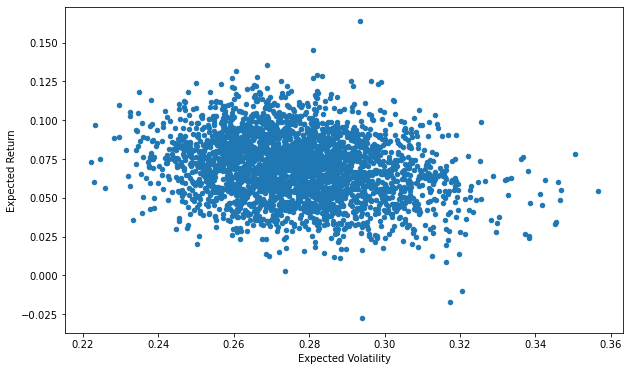

In [38]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [39]:
#generate path and name then export
path = 'results/'
name = '_'.join(assets)
path_name = path + name  + '.csv'
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [40]:
# calculation & output
path_name2 = 'txt_results/' + name + '.txt'
f = open(path_name2, "a")

print("money amount calculation for demo use only, please don't simply invest on this results alone.", file=f)

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

# set money here 
total_investment = 50000
print("Intend to invest ${:.2f}".format(total_investment) + " total.", file=f)

money_inv = []
for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    money_inv.append(inv)
    print("\t{:.0f}".format(money_inv[i] // pf_data.iloc[-1][i]) + " shares should long in ticker:" + assets[i], file=f)
    print("\t price @ ${:.2f} per share".format(pf_data.iloc[-1][i]), file=f)
    print("\t invest in " + assets[i] + " for ${:.2f}".format(inv) + ".", file=f)
    print("\t  represents {:.1f}% of total investment".format(sorted_portfolios[assets[i]].iloc[0] * 100), file=f)
    
print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%", file=f)
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%", file=f)

f.close()